In [88]:
##Correlation analysis: 
#(Generalized linear mixed effect models) 

#Type of Motivation - > using sport apps (wether? how often? What for?)

#Age (Median or continuous variable) and motivation -> use of sport apps 

#Reason for people using app - > how often they are using sport app 



In [89]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns 
from scipy import stats

In [111]:
data = pd.read_csv("data.csv")
data


,Unnamed: 0,Gender,Age,Sport Frequency,Type of Sport,Ever used Sportapp,Frequency Sportapp,Reason sportapp,Goals more efficient through sportapp,Motivation when comparing to friends,Amotivation,External Regulation,Introjected Regulation,Identified Regulation,Integrated Regulation,Intrinsic Motivation,numSports,compare
0,0,Weiblich,22,5,"Joggen, Ballsportarten, Schwimmen",Ja,1,"Zum Tracken meiner Leistungen, Um mir Ziele zu...",Ja,Nein,1.25,2.75,4.00,3.50,4.25,4.25,2,0
1,1,Weiblich,23,3,"Fitness-Kurse, Tanzen",Ja,1,"Zum Tracken meiner Leistungen, Um das Training...",Ja,Ja,3.00,3.00,4.00,3.75,3.25,3.50,1,1
2,2,Weiblich,25,3,"Joggen, Kraftsport, Ballsportarten",Ja,1,Zum Tracken meiner Leistungen,Ja,Nein,1.25,2.00,4.50,3.00,4.25,4.25,2,0
3,3,Weiblich,18,3,"Kraftsport, Ballsportarten",Ja,1,"Zum Tracken meiner Leistungen, Um einen Sport-...",Ja,Nein,1.50,2.25,3.25,3.75,5.00,4.00,1,0
4,4,Weiblich,18,1,"Ballsportarten, Fahrrad fahren",Ja,0,Zum Tracken meiner Leistungen,Ja,Nein,2.25,2.00,3.00,3.00,3.75,2.50,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,108,Weiblich,65,5,Walken,Nein,0,Benutze keine Sportapp,Nein,Nein,1.00,1.00,2.00,1.00,1.00,1.00,0,0
109,109,Männlich,54,0,"Schwimmen, Radfahren",Nein,0,Um mir Ziele zu setzen,Nein,Nein,1.00,1.50,2.75,1.50,1.75,1.75,1,0
110,110,Weiblich,64,3,Fitness-Kurse,Ja,1,"Zum Tracken meiner Leistungen, Um Kurse zu Buc...",Ja,Nein,1.50,2.00,4.75,3.50,3.50,4.25,0,0
111,111,Männlich,24,3,Badminton,Ja,1,"Zum Tracken meiner Leistungen, Um das Training...",Ja,Ja,2.50,2.25,3.75,3.50,3.75,4.25,0,1


In [91]:
meandata = data.groupby('Ever used Sportapp',as_index=False)['Amotivation','External Regulation','Introjected Regulation','Identified Regulation','Integrated Regulation','Intrinsic Motivation'].mean()
meandata = meandata[meandata.columns[1:]]
meandata

<ipython-input-91-fc92293f3a98>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  meandata = data.groupby('Ever used Sportapp',as_index=False)['Amotivation','External Regulation','Introjected Regulation','Identified Regulation','Integrated Regulation','Intrinsic Motivation'].mean()


,Amotivation,External Regulation,Introjected Regulation,Identified Regulation,Integrated Regulation,Intrinsic Motivation
0,1.875000,2.023438,3.742188,3.132812,3.794271,3.692708
1,1.882353,1.808824,3.338235,2.441176,3.161765,2.911765


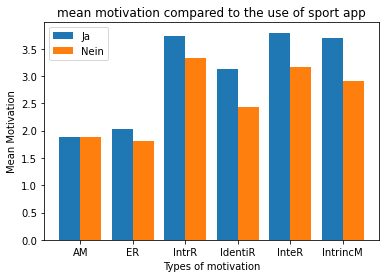

In [92]:
#impact of using sports app on different sports motivation types

X = ['AM','ER','IntrR','IdentiR','InteR','IntrincM'] # motivation types 

data_yes = meandata.iloc[0].to_list()
data_no = meandata.iloc[1].to_list()

  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, data_yes, 0.4, label = 'Ja')
plt.bar(X_axis + 0.2, data_no, 0.4, label = 'Nein')
  
plt.xticks(X_axis, X)
plt.xlabel("Types of motivation")
plt.ylabel("Mean Motivation")
plt.title("mean motivation compared to the use of sport app")
plt.legend()
plt.show()

In [93]:
meandata = data.groupby('Goals more efficient through sportapp',as_index=False)['Amotivation','External Regulation','Introjected Regulation','Identified Regulation','Integrated Regulation','Intrinsic Motivation'].mean()
meandata = meandata[meandata.columns[1:]]
meandata

<ipython-input-93-1fd7e429d707>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  meandata = data.groupby('Goals more efficient through sportapp',as_index=False)['Amotivation','External Regulation','Introjected Regulation','Identified Regulation','Integrated Regulation','Intrinsic Motivation'].mean()


,Amotivation,External Regulation,Introjected Regulation,Identified Regulation,Integrated Regulation,Intrinsic Motivation
0,1.922840,2.089506,3.777778,3.043210,3.750000,3.592593
1,1.757812,1.742188,3.437500,2.992188,3.570312,3.531250


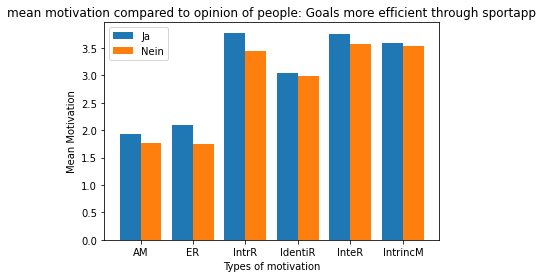

In [94]:
#impact of using sports app on different sports motivation types

X = ['AM','ER','IntrR','IdentiR','InteR','IntrincM'] # motivation types 

data_yes = meandata.iloc[0].to_list()
data_no = meandata.iloc[1].to_list()

  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, data_yes, 0.4, label = 'Ja')
plt.bar(X_axis + 0.2, data_no, 0.4, label = 'Nein')
  
plt.xticks(X_axis, X)
plt.xlabel("Types of motivation")
plt.ylabel("Mean Motivation")
plt.title("mean motivation compared to opinion of people: Goals more efficient through sportapp")
plt.legend()
plt.show()

In [95]:
meandata = data.groupby('Motivation when comparing to friends',as_index=False)['Amotivation','External Regulation','Introjected Regulation','Identified Regulation','Integrated Regulation','Intrinsic Motivation'].mean()
meandata = meandata[meandata.columns[1:]]
meandata

<ipython-input-95-e94a4a029bad>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  meandata = data.groupby('Motivation when comparing to friends',as_index=False)['Amotivation','External Regulation','Introjected Regulation','Identified Regulation','Integrated Regulation','Intrinsic Motivation'].mean()


,Amotivation,External Regulation,Introjected Regulation,Identified Regulation,Integrated Regulation,Intrinsic Motivation
0,1.941860,2.174419,3.831395,3.244186,3.872093,3.825581
1,1.835714,1.878571,3.589286,2.896429,3.592857,3.421429


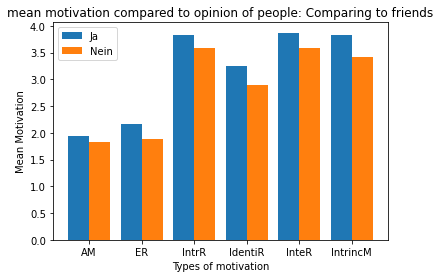

In [96]:
#impact of using sports app on different sports motivation types

X = ['AM','ER','IntrR','IdentiR','InteR','IntrincM'] # motivation types 

data_yes = meandata.iloc[0].to_list()
data_no = meandata.iloc[1].to_list()

  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, data_yes, 0.4, label = 'Ja')
plt.bar(X_axis + 0.2, data_no, 0.4, label = 'Nein')
  
plt.xticks(X_axis, X)
plt.xlabel("Types of motivation")
plt.ylabel("Mean Motivation")
plt.title("mean motivation compared to opinion of people: Comparing to friends")
plt.legend()
plt.show()

In [97]:
meandata = data.groupby('Frequency Sportapp',as_index=False)['Amotivation','External Regulation','Introjected Regulation','Identified Regulation','Integrated Regulation','Intrinsic Motivation'].mean()
meandata = meandata[meandata.columns[1:]]
meandata

<ipython-input-97-12a8c43667dc>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  meandata = data.groupby('Frequency Sportapp',as_index=False)['Amotivation','External Regulation','Introjected Regulation','Identified Regulation','Integrated Regulation','Intrinsic Motivation'].mean()


,Amotivation,External Regulation,Introjected Regulation,Identified Regulation,Integrated Regulation,Intrinsic Motivation
0,1.805556,1.750000,3.236111,2.444444,3.361111,3.166667
1,1.940909,2.122727,3.759091,3.181818,3.827273,3.672727
2,1.851852,2.009259,3.805556,3.046296,3.527778,3.490741
3,1.750000,1.730769,3.711538,3.153846,3.980769,3.903846


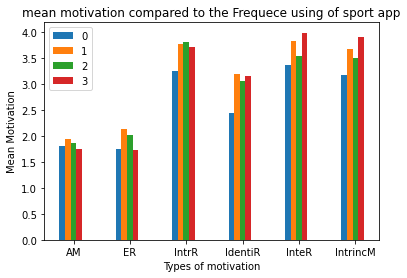

In [98]:
#impact of frequency in using sports app on different sports motivation types

X = ['AM','ER','IntrR','IdentiR','InteR','IntrincM'] # motivation types 

data_0 = meandata.iloc[0].to_list()
data_1 = meandata.iloc[1].to_list()
data_2 = meandata.iloc[2].to_list()
data_3 = meandata.iloc[3].to_list()

  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, data_0, 0.1, label = '0')
plt.bar(X_axis - 0.1, data_1, 0.1, label = '1')
plt.bar(X_axis , data_2, 0.1, label = '2')
plt.bar(X_axis + 0.1, data_3, 0.1, label = '3')
  
plt.xticks(X_axis, X)
plt.xlabel("Types of motivation")
plt.ylabel("Mean Motivation")
plt.title("mean motivation compared to the Frequece using of sport app")
plt.legend()
plt.show()

In [108]:
meandata = data.groupby('numSports',as_index=False)['Amotivation','External Regulation','Introjected Regulation','Identified Regulation','Integrated Regulation','Intrinsic Motivation'].mean()
meandata = meandata[meandata.columns[1:]]
meandata

<ipython-input-108-433cd9337ce4>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  meandata = data.groupby('numSports',as_index=False)['Amotivation','External Regulation','Introjected Regulation','Identified Regulation','Integrated Regulation','Intrinsic Motivation'].mean()


,Amotivation,External Regulation,Introjected Regulation,Identified Regulation,Integrated Regulation,Intrinsic Motivation
0,1.931818,1.787879,3.469697,2.825758,3.378788,3.242424
1,1.925000,2.125000,3.693750,2.981250,3.706250,3.537500
2,1.787037,1.907407,3.722222,3.101852,3.833333,3.861111
3,1.722222,2.000000,3.805556,3.277778,3.972222,3.722222
4,1.875000,2.875000,4.750000,4.125000,4.750000,4.437500


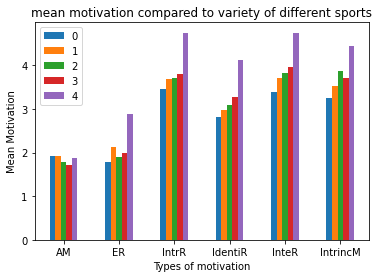

In [110]:
#impact of frequency in using sports app on different sports motivation types

X = ['AM','ER','IntrR','IdentiR','InteR','IntrincM'] # motivation types 

data_0 = meandata.iloc[0].to_list()
data_1 = meandata.iloc[1].to_list()
data_2 = meandata.iloc[2].to_list()
data_3 = meandata.iloc[3].to_list()
data_4= meandata.iloc[4].to_list()

  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, data_0, 0.1, label = '0')
plt.bar(X_axis - 0.1, data_1, 0.1, label = '1')
plt.bar(X_axis , data_2, 0.1, label = '2')
plt.bar(X_axis + 0.1, data_3, 0.1, label = '3')
plt.bar(X_axis + 0.2, data_4, 0.1, label = '4')
  
plt.xticks(X_axis, X)
plt.xlabel("Types of motivation")
plt.ylabel("Mean Motivation")
plt.title("mean motivation compared to variety of different sports")
plt.legend()
plt.show()

In [112]:
meandata = data.groupby('compare',as_index=False)['Amotivation','External Regulation','Introjected Regulation','Identified Regulation','Integrated Regulation','Intrinsic Motivation'].mean()
meandata = meandata[meandata.columns[1:]]
meandata

<ipython-input-112-924c8b9186ba>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  meandata = data.groupby('compare',as_index=False)['Amotivation','External Regulation','Introjected Regulation','Identified Regulation','Integrated Regulation','Intrinsic Motivation'].mean()


,Amotivation,External Regulation,Introjected Regulation,Identified Regulation,Integrated Regulation,Intrinsic Motivation
0,1.863402,1.951031,3.657216,2.987113,3.680412,3.543814
1,1.953125,2.234375,3.828125,3.281250,3.812500,3.765625


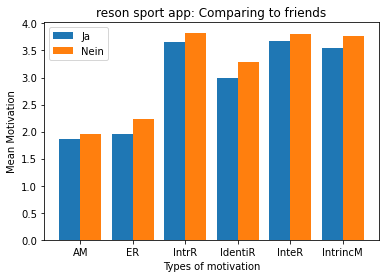

In [113]:
#impact of using sports app on different sports motivation types

X = ['AM','ER','IntrR','IdentiR','InteR','IntrincM'] # motivation types 

data_yes = meandata.iloc[0].to_list()
data_no = meandata.iloc[1].to_list()

  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, data_yes, 0.4, label = 'Ja')
plt.bar(X_axis + 0.2, data_no, 0.4, label = 'Nein')
  
plt.xticks(X_axis, X)
plt.xlabel("Types of motivation")
plt.ylabel("Mean Motivation")
plt.title("reson sport app: Comparing to friends")
plt.legend()
plt.show()

In [100]:
# checking if data is normally distibuted 
shapiro_test = stats.shapiro(data["Introjected Regulation"])
print(shapiro_test[0])
#p-value: p<= 0.05 
p_value= shapiro_test[1]
print(p_value)

0.9568232297897339
0.0010796304559335113


In [101]:
# checking if data is normally distibuted 
shapiro_test = stats.shapiro(data["Amotivation"])
print(shapiro_test[0])
#p-value: p<= 0.05 
p_value= shapiro_test[1]
print(p_value)

0.9440552592277527
0.00013321063306648284


In [102]:
# checking if data is normally distibuted 
shapiro_test = stats.shapiro(data["External Regulation"])
print(shapiro_test[0])
#p-value: p<= 0.05 
p_value= shapiro_test[1]
print(p_value)

0.9446211457252502
0.00014547212049365044


In [103]:
# checking if data is normally distibuted 
shapiro_test = stats.shapiro(data["Identified Regulation"])
print(shapiro_test[0])
#p-value: p<= 0.05 
p_value= shapiro_test[1]
print(p_value)

0.9716628193855286
0.01671190932393074


In [104]:
# checking if data is normally distibuted 
shapiro_test = stats.shapiro(data["Integrated Regulation"])
print(shapiro_test[0])
#p-value: p<= 0.05 
p_value= shapiro_test[1]
print(p_value)

0.9190037250518799
3.869223291985691e-06


In [105]:
# checking if data is normally distibuted 
shapiro_test = stats.shapiro(data["Intrinsic Motivation"])
print(shapiro_test[0])
#p-value: p<= 0.05 
p_value= shapiro_test[1]
print(p_value)

0.9256382584571838
9.284160114475526e-06


In [106]:
# checking if data is normally distibuted 
shapiro_test = stats.shapiro(data["Frequency Sportapp"])
print(shapiro_test[0])
#p-value: p<= 0.05 
p_value= shapiro_test[1]
print(p_value)

0.8574048280715942
4.86439200031441e-09


In [107]:
# Question: Are people more Intrinsic motivated if they are using sport apps regularly (for any trainings)
#h_0 : People are less intrisic motivated if they are not using sports apps for any training


